In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#To check for columns in the 'Measurement' table
for column in Measurement.__table__.columns:
    print(column)

measurement.id
measurement.station
measurement.date
measurement.prcp
measurement.tobs


In [10]:
for column in Measurement.__table__.columns:
    print(column)

measurement.id
measurement.station
measurement.date
measurement.prcp
measurement.tobs


In [11]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(desc(Measurement.date)).first()

('2017-08-23',)

In [31]:
start = "2017-08-23"

sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
# start_2 = dt.datetime.strptime(start, "%Y-%m-%d")

results = session.query(*sel).\
            filter(Measurement.date >= start).all()
temps = list(np.ravel(results))

temps


[76.0, 80.25, 82.0]

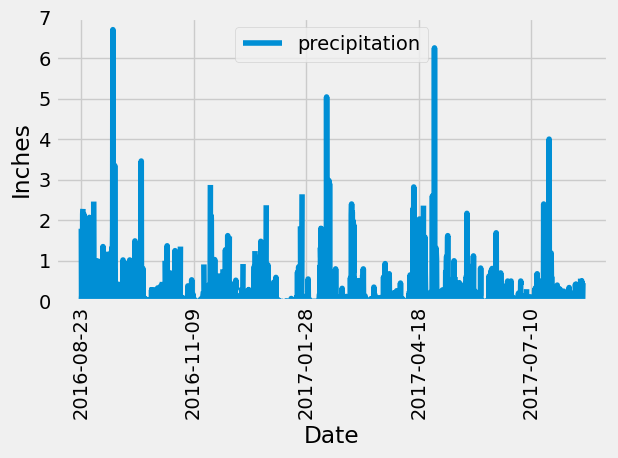

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

##CALCULATION/LOGIC: If latest date is '2017-08-23', then 12 months ago/1 year ago is '2016-08-23'.

# Perform a query to retrieve the data and precipitation scores
dateprcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date <= '2017-08-23').\
    filter(Measurement.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame, explicitly set the column names, and sorting the dataframe by date
date_prcp_df = pd.DataFrame(dateprcp, columns = ['date', 'precipitation']).sort_values(by=['date'])
date_prcp_df.set_index('date', inplace = True)

# Use Pandas Plotting with Matplotlib to plot the data
date_prcp_df.plot()
plt.ylim([0, 7])
plt.ylabel('Inches')
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
date_prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
tot_station = 0

for station in session.query(Measurement.station).distinct():
    tot_station += 1

tot_station

# Alternatively, I found that this code yields the same result

# session.query(Measurement.station).distinct().count()


# Or this code

# tot_station = []

# for station in session.query(Measurement.station).distinct():
#     tot_station.append(station)
    
    
# print(len(tot_station))

9

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(desc(func.count(Measurement.station))).all()

most_active_stations

# The id of the most active station is USC00519281

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
for column in Station.__table__.columns:
    print(column)

station.id
station.station
station.name
station.latitude
station.longitude
station.elevation


In [17]:
statn = session.query(Station.station, Station.name).\
    group_by(Station.station).\
    all()

station_dict = dict(statn)
station_dict

{'USC00511918': 'HONOLULU OBSERVATORY 702.2, HI US',
 'USC00513117': 'KANEOHE 838.1, HI US',
 'USC00514830': 'KUALOA RANCH HEADQUARTERS 886.9, HI US',
 'USC00516128': 'MANOA LYON ARBO 785.2, HI US',
 'USC00517948': 'PEARL CITY, HI US',
 'USC00518838': 'UPPER WAHIAWA 874.3, HI US',
 'USC00519281': 'WAIHEE 837.5, HI US',
 'USC00519397': 'WAIKIKI 717.2, HI US',
 'USC00519523': 'WAIMANALO EXPERIMENTAL FARM, HI US'}

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
exploration_data = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

exploration_data

[(54.0, 85.0, 71.66378066378067)]

In [19]:
@app.route("/api/v1.0/min_max_avg_temp/<start>")
def start_date(start):
    most_recent_date = '2017-08-23'
    
    min = session.query(func.min(Measurement.tobs)).filter(Measurement.date >= start).filter(Measurement.date <= most_recent_date).scalar()
    max = session.query(func.max(Measurement.tobs)).filter(Measurement.date >= start).filter(Measurement.date <= most_recent_date).scalar() 
    avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.date >= start).filter(Measurement.date <= most_recent_date).scalar()
    
    min_max_avg_temp = {
        "min_temp" : min,
        "max_temp" : max,
        "avg_temp" : avg
    }
    
    return jsonify(min_max_avg_temp)

NameError: name 'app' is not defined

In [26]:
start = '2014-09-23'
most_recent_date = '2017-08-23'

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.date >= start).filter(Measurement.date <= most_recent_date).all()

[(56.0, 87.0, 74.00190281030444)]

In [24]:
min = session.query(func.min(Measurement.tobs)).filter(Measurement.date >= start).filter(Measurement.date <= most_recent_date).scalar()
max = session.query(func.max(Measurement.tobs)).filter(Measurement.date >= start).filter(Measurement.date <= most_recent_date).scalar() 
avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.date >= start).filter(Measurement.date <= most_recent_date).scalar()
    
min_max_avg_temp = {
        "min_temp" : min,
        "max_temp" : max,
        "avg_temp" : avg
    }

In [25]:
min_max_avg_temp

{'min_temp': 56.0, 'max_temp': 87.0, 'avg_temp': 74.00190281030444}

In [ ]:
session.query(func.min(Measurement.tobs)).\
    filter(Measurement.date >= '2014-09-23').\
    filter(Measurement.date <= '2017-08-23').scalar()

In [ ]:
session.query(func.max(Measurement.date)).scalar()

In [ ]:
date_temp_mostactive = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date <= '2017-08-23').\
    filter(Measurement.date >= '2016-08-23').all()

most_active_station = dict(date_temp_mostactive)
most_active_station

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temperature = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date <= '2017-08-23').\
    filter(Measurement.date >= '2016-08-23').all()

temp_df = pd.DataFrame(temperature, columns = ["tobs"])


plt.hist(temp_df, bins = 12, label= 'tobs')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.show()


# Close Session

In [ ]:
# Close Session
session.close()